## Autoreload

In [1]:
%reload_ext autoreload
%autoreload 2

## Libraries

In [2]:
# %pip install IPython
from IPython.display import display
from sigepy import utils, ssi_cov

## Parameters

In [3]:
# Column names of the data
labels = ["X", "Y", "Z"] # + Acceleration
#labels_corrected = ["X Corrected", "Y Corrected", "Z Corrected"] # + Acceleration

# Butterworth filter parameters
lowcut = 0.3  # Lower cutoff frequency (Hz)
highcut = 30  # Upper cutoff frequency (Hz)
order = 2  # Filter order

# time window for the data
start_time = 0
power_of_two = 10

# Files
file_name = 'acceleration.csv'
file_location = utils.get_tests_files_location(file_name)

min_model_order = 3
max_model_order = 30


**Import acceleration data**

In [4]:
df_original = utils.import_csv_acceleration(file_location, labels) # Import data for wavelets and fft analysis

In [5]:
df_original

,Time,X Acceleration,Y Acceleration,Z Acceleration
0,0.000,1.087129,0.925343,4.712572
1,0.005,2.101631,-2.166347,5.816967
2,0.010,0.759436,0.796111,4.537714
3,0.015,-0.116920,1.040630,2.581114
4,0.020,0.142441,0.554304,-1.987320
...,...,...,...,...
2354,11.770,2.090516,-0.154061,2.936849
2355,11.775,0.725332,-0.140685,2.058270
2356,11.780,-0.117244,-1.143419,-0.775098
2357,11.785,0.143363,0.107660,-3.746027


# Column names of the data
labels = ["X", "Y", "Z"] # + Acceleration
#labels_corrected = ["X Corrected", "Y Corrected", "Z Corrected"] # + Acceleration

# Butterworth filter parameters
lowcut = 0.3  # Lower cutoff frequency (Hz)
highcut = 30  # Upper cutoff frequency (Hz)
order = 2  # Filter order

# time window for the data
start_time = 0
power_of_two = 10

# Files
file_name = 'cable_acceleration.txt'
file_location = utils.get_tests_files_location(file_name)

min_model_order = 3
max_model_order = 30

df_original = utils.import_sts_acceleration_txt(file_location, labels) # Import data for wavelets and fft analysis

df_original

In [6]:
df_ready = utils.SignalProcessor(df_original, labels, lowcut, highcut, order, start_time, power_of_two).execute_preparing_signal()

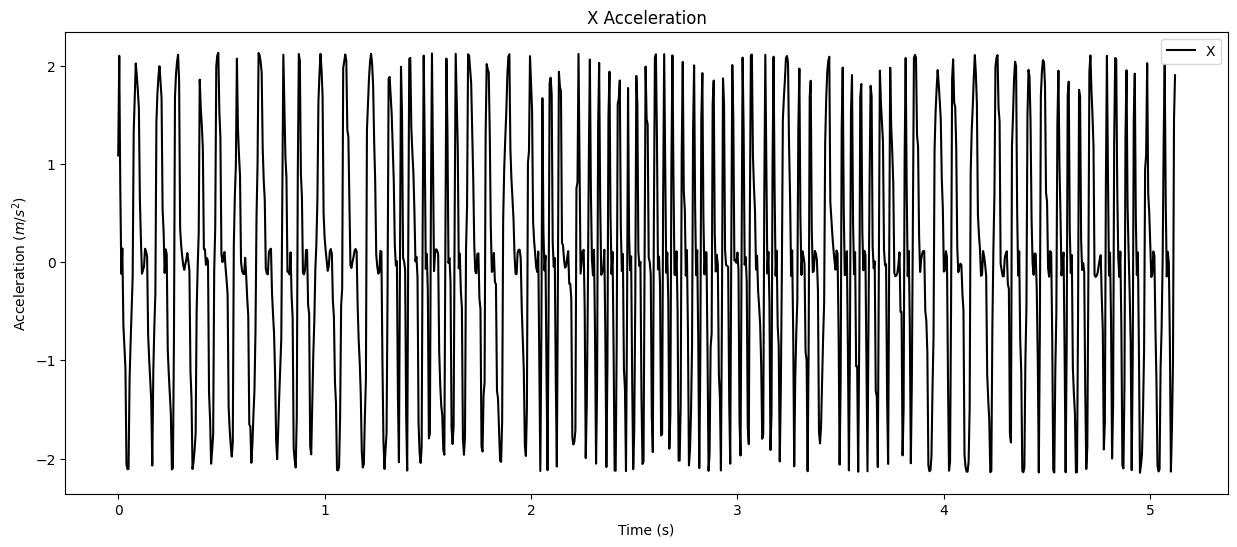

In [7]:
utils.plot_acceleration(df_ready, labels[0], color='k') # 0 for 'X', 1 for 'Y', 2 for 'Z'

In [8]:
max_power_of_two = utils.estimate_power_of_two(df_original) # maximun exponent for the number of samples recomended for the fft
print(f'n = {max_power_of_two}')

n = 12


In [9]:
signal_object = utils.SignalProcessor(df_original, labels, lowcut, highcut, order, start_time, power_of_two)

In [10]:
df_windowed = signal_object.filter_time_window()

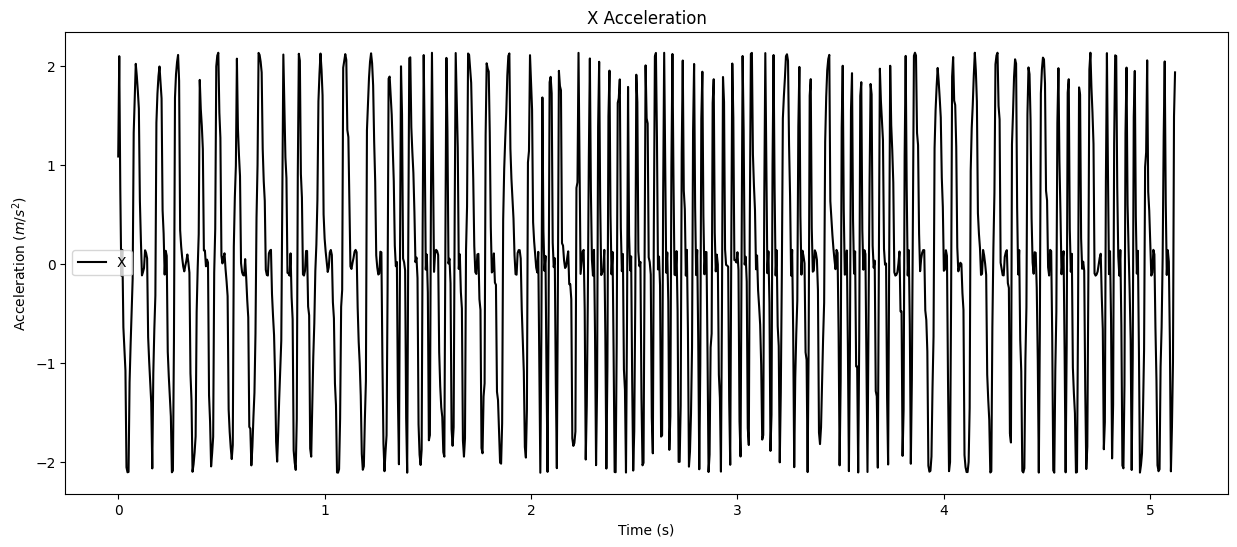

In [11]:
utils.plot_acceleration(df_windowed, labels[0], color='k') # 0 for 'X', 1 for 'Y', 2 for 'Z'

In [12]:
ssicov = ssi_cov.SSICov(df_windowed, labels, min_model_order, max_model_order)

In [ ]:
stable_frequencies, stable_damping_ratios, stable_mode_shapes, stable_MAC_values, stability_statuses, natural_frequencies = ssicov.execute_ssicov_analysis()

Building Toeplitz Matrix: 100%|██████████| 1044484/1044484 [00:01<00:00, 625749.13block/s]


In [ ]:
ssicov.plot_stability_diagram()

In [ ]:
ssicov.plotly_stability_diagram()